In [23]:
# from sklearn import datasets
import numpy as np

# iris = datasets.load_iris()
# len(iris_features)

In [24]:
import pandas as pd
df = pd.read_csv("Iris.csv")
iris_features = df[["SepalLengthCm", "SepalWidthCm"]].values
iris_features_name = df.columns[1:3]
iris_target = np.zeros(len(df["Species"].values))
iris_target_names = np.unique(df["Species"].values)
for i in range(len(iris_target_names)):
    iris_target[df["Species"].values == iris_target_names[i]] = i
iris_features_name

Index(['SepalLengthCm', 'SepalWidthCm'], dtype='object')

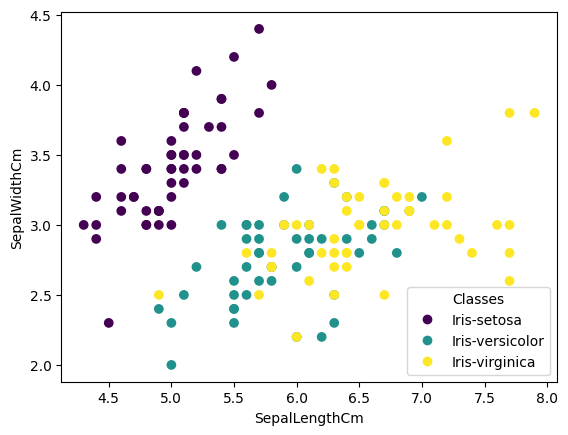

In [25]:
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris_features[:, 0], iris_features[:, 1], c=iris_target)
ax.set(xlabel=iris_features_name[0], ylabel=iris_features_name[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris_target_names, loc="lower right", title="Classes"
)

In [26]:
# Bài 1b
# 'setosa', 'versicolor', 'virginica'
iris_type = [0, 1, 2]

for t in iris_type:
    data_sort = sorted(iris_features[iris_target == t][:,0],reverse=True)
    print(f"{iris_target_names[t]}: {data_sort[:10]}")



Iris-setosa: [5.8, 5.7, 5.7, 5.5, 5.5, 5.4, 5.4, 5.4, 5.4, 5.4]
Iris-versicolor: [7.0, 6.9, 6.8, 6.7, 6.7, 6.7, 6.6, 6.6, 6.5, 6.4]
Iris-virginica: [7.9, 7.7, 7.7, 7.7, 7.7, 7.6, 7.4, 7.3, 7.2, 7.2]


In [27]:
# Bài 2b
iris_sum = iris_features[:,0] + iris_features[:,1]
iris_sum_top_50_idx = np.argsort(-iris_sum)[:50]

iris_sum_top_50 = iris_target[iris_sum_top_50_idx]
for t in iris_type:
    print(f"{iris_target_names[t]}: {np.sum(iris_sum_top_50 == t)}")


Iris-setosa: 7
Iris-versicolor: 13
Iris-virginica: 30


In [28]:
# Bài 3b
from numpy.linalg import norm



def nearest_neightbor(input, k, x, y, label):
    dist = norm(input - x, axis=1)
    sorted_dist_idx = np.argsort(dist)[:k]
    sorted_dist = dist[sorted_dist_idx]
    target_sorted = y[sorted_dist_idx]
    vote = np.zeros(3)
    for t in iris_type:
        vote[t] = np.sum(target_sorted == t)
    
    if np.sum(sorted_dist == np.min(sorted_dist)) == np.sum(vote == np.max(vote)):
        nearest_neightbor(input, k+1, x, y, label)
    return f"a) This sample belongs to class {label[np.argmax(vote)]}"


def k_nearest_neighbor(k, input, x, y, label):
    dist = norm(input - x, axis=1)
    sorted_dist_idx = np.argsort(dist)
    
    top_k_idx = sorted_dist_idx[:k]
    top_k_target = y[top_k_idx]
    vote = np.zeros(3)
    for t in iris_type:
        vote[t] = np.sum(top_k_target == t)
    if np.sum(vote == np.max(vote)) == 1:
        return f"b) This sample belongs to class {label[np.argmax(vote)]}"
    return f"b) This sample doesn't belong to any class"
        

def nearest_neightbor_circle(input, x, y, label):
    dist = norm(input - x, axis=1)
    in_circle_target = y[dist <= 0.2]
    vote = np.zeros(3)
    for t in iris_type:
        vote[t] = np.sum(in_circle_target == t)
    if np.sum(vote == np.max(vote)) == 1:
        return f"c) This sample belongs to class {label[np.argmax(vote)]}"
    return f"c) This sample doesn't belong to any class" 



    

In [29]:
# sepal_length = 6.2
# sepal_width = 2.9
sepal_length = float(input("Input sepal length: "))
sepal_width = float(input("Input sepal width: "))

new_data = np.array([sepal_length, sepal_width])
# a
print(nearest_neightbor(new_data, 2, iris_features[:,:2], iris_target, iris_target_names))
# b
print(k_nearest_neighbor(7, new_data, iris_features[:,:2], iris_target, iris_target_names))
# c
print(nearest_neightbor_circle(new_data, iris_features[:,:2], iris_target, iris_target_names))

a) This sample belongs to class Iris-versicolor
b) This sample belongs to class Iris-virginica
c) This sample belongs to class Iris-virginica


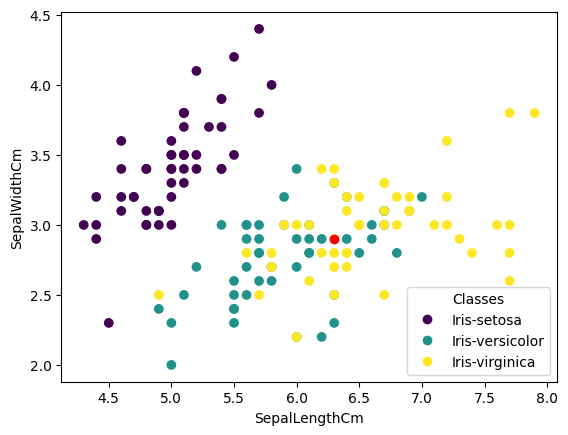

In [30]:
_, ax = plt.subplots()
scatter = ax.scatter(iris_features[:, 0], iris_features[:, 1], c=iris_target)
ax.set(xlabel=iris_features_name[0], ylabel=iris_features_name[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris_target_names, loc="lower right", title="Classes"
)
plt.scatter(sepal_length, sepal_width, c='red')

